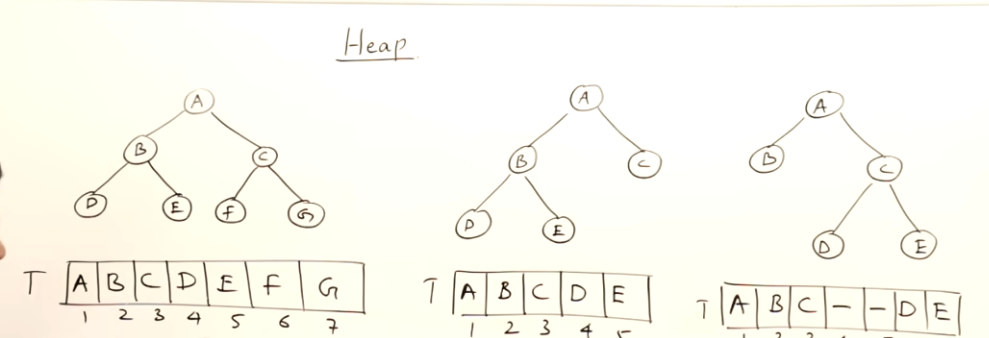

In [1]:
from IPython.display import Image
Image("/workspaces/Atlas/DSA/images/Heap/array_repr_BT.png")


  
if NODE is at index = idx  
Left Child = 2 * idx  
Right Child = 2 * idx + 1  
Parent = idx // 2  

**Full Binary Treee** : In full binary tree there is no space for any new node. If height of the binary tree is 'h' then max node = (2^h+1) -1, so if height is 2 (Level 3) then max node = 2^3 -1 = 5 nodes. So a binary tree with maximum number of nodes is a full binary tree.

**Complete Binary Tree** : When represented a BT in array and if there are no missing elements between start-end index, it's a complete binary tree. Every full binary tree is also a complete binary tree. A complete binary tree is a full binary tree upto height h-1, and in the last level elements are filled from Left->Right. * Height of a complete binary tree will be minimum only, it will be always <u>logn</u>.
examples:-  
<img src="/workspaces/Atlas/DSA/images/Heap/CBT_examples.png">

**Heap**  Heap is a complete binary Tree.  
<img src="/workspaces/Atlas/DSA/images/Heap/heap.png">

**Insertion in MAX-Heap** : for insertion direction for adjustment is "upward", total number of swaps depends on height of tree. adding 6 here will take O(1) and 60 will take O(logn) max time where logn is height of tree. So time complexity ranges O(1) -> O(logN)

<img src="/workspaces/Atlas/DSA/images/Heap/insertion_heap.png">

**Deletion in MAX-Heap** : only root can be deleted then only it will maintain it's heap property. Adjustment would be "downwards".  
Delete Root from start index / swap with last element in array(will preserve complete binary tree property) then (adjustments)-> removing from root continiously and keeping & adjusting them at the end will give sorted value. 

Deletion time - Depends on height O(logN)

<img src="/workspaces/Atlas/DSA/images/Heap/deletion_Heap_1.png">

<img src="/workspaces/Atlas/DSA/images/Heap/deletion_heapify_sorted.png">

**Heap Sort** : Create a heap for any unstored list, and then delete root one by one by preserving it with the last index swapped value, will yield a sorted list.

**Step 1 :: Create Heap** : to create a heap if "n" elements are there then n & Adjustments(height of complete binary tree- logN) = <u>O(n logN)</u>

<img src="/workspaces/Atlas/DSA/images/Heap/create_heap.png">

**Step 2 :: Delete Heap** : Delete root one by one and adjustments. <u>O(n logN)</u>

**Total Time** = creation O(n logN) + deletion O(n logN) -> 2nlogN => O(logN)

**Heapify** : O(n)

In [1]:
class Heap:
    def __init__(self, is_min_heap=True) -> None:
        # Initialize a list for heap
        self.is_min_heap = is_min_heap
        self.heap = [None]              # starting from index 1, 0th will be unused

    def swap(self, i, j):
        self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

    def compare(self, child, parent):
        """
        Compare 2 elements based on the Heap Type
        Min-Heap : parent should be smaller than child
        Max-Heap : parent sould be greater than child
        """
        if self.is_min_heap:
            return child < parent         # Min-Heap: smaller child
        else:
            return child > parent         # Max-Heap: larger child

    def heapify_upward(self, idx):
        # maintain the heap property by moving the element at index up the heap
        parent_idx = idx // 2
        
        if parent_idx >= 1 and self.compare(self.heap[idx], self.heap[parent_idx]):
            self.swap(idx, parent_idx)
            self.heapify_upward(parent_idx)

    def heapify_downward(self, idx):
        #maintain the heap property by moving the element at index down the heap
        left_child_idx = 2 * idx
        right_child_idx = 2 * idx + 1
        smallest_or_largest = idx

        #check left child
        if left_child_idx < len(self.heap) and self.compare(self.heap[left_child_idx], self.heap[smallest_or_largest]):
            smallest_or_largest = left_child_idx

        #check right child
        if right_child_idx < len(self.heap) and self.compare(self.heap[right_child_idx], self.heap[smallest_or_largest]):
            smallest_or_largest = right_child_idx       

        if smallest_or_largest != idx:
            self.swap(idx, smallest_or_largest)
            self.heapify_downward(smallest_or_largest)             

    def push(self, value):
        #insertion is from leftmost in tree and then adjustment towards upward direction
        self.heap.append(value)
        self.heapify_upward(len(self.heap) - 1)

    def pop(self):
        # Remove and return the root element (min or max) while restoring the heap property.
        if len(self.heap) == 1:
            raise IndexError("pop from empty heap")
        
        #swap root with last element
        root = self.heap[1]
        self.swap(1, len(self.heap)-1)
        # pop the last element which was at the root earlier before swapping, now it became the last element in array
        self.heap.pop()
        # Restore the heap property by heapifying down
        if len(self.heap) > 1:
            self.heapify_downward(1)
        return root
    
    def peek(self):
        # Return the root element(min/max) without removing it
        if len(self.heap) <= 1:
            raise IndexError("peek from empty heap")
        return self.heap[1]

In [2]:
# Example Usage

# Min-Heap example
min_heap = Heap(is_min_heap=True)
min_heap.push(10)
min_heap.push(20)
min_heap.push(5)
min_heap.push(30)
min_heap.push(3)

print("Min-Heap:")
print(min_heap.heap[1:])  # Show heap ignoring index 0
print("Pop min element:", min_heap.pop())  # Remove the smallest element
print("Peek min element:", min_heap.peek())  # Look at the smallest element
print(min_heap.heap[1:])

# Max-Heap example
max_heap = Heap(is_min_heap=False)
max_heap.push(10)
max_heap.push(20)
max_heap.push(5)
max_heap.push(30)
max_heap.push(3)

print("\nMax-Heap:")
print(max_heap.heap[1:])  # Show heap ignoring index 0
print("Pop max element:", max_heap.pop())  # Remove the largest element
print("Peek max element:", max_heap.peek())  # Look at the largest element
print(max_heap.heap[1:])

Min-Heap:
[3, 5, 10, 30, 20]
Pop min element: 3
Peek min element: 5
[5, 20, 10, 30]

Max-Heap:
[30, 20, 5, 10, 3]
Pop max element: 30
Peek max element: 20
[20, 10, 5, 3]
